# 0. Import Libraries 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import statsmodels as sn
import matplotlib.pyplot as plt
sns.set()

We most likely will require more libaries or dependencies later on but we will add them as we go along

# 1. Import Data

In [2]:
raw_data = pd.read_csv('churn.csv')

# 2. Exploratory Data Analysis

In this first section we go through the train and store data, handle missing values and create new features for further analysis.

In [3]:
raw_data.head()

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [4]:
raw_data.columns

Index(['Customer ID', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'tenure', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7044 entries, 0 to 7043
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        7044 non-null   object 
 1   Gender             7044 non-null   object 
 2   Senior Citizen     7044 non-null   int64  
 3   Partner            7044 non-null   object 
 4   Dependents         7044 non-null   object 
 5   tenure             7044 non-null   int64  
 6   Phone Service      7044 non-null   object 
 7   Multiple Lines     7044 non-null   object 
 8   Internet Service   7044 non-null   object 
 9   Online Security    7044 non-null   object 
 10  Online Backup      7044 non-null   object 
 11  Device Protection  7044 non-null   object 
 12  Tech Support       7044 non-null   object 
 13  Streaming TV       7044 non-null   object 
 14  Streaming Movies   7044 non-null   object 
 15  Contract           7044 non-null   object 
 16  Paperless Billing  7044 

In [6]:
df = raw_data.copy()

Data appreads to be in good condition. We have no null variables and the data type of each coloumn is correct.
If we had null valuables we would have replaced the NaN with the median values.

# 3. Visulising Data

Out of curiosity, I would like to identiy any overt trend. Visualising data is the easitest way to coduct trend analysis 

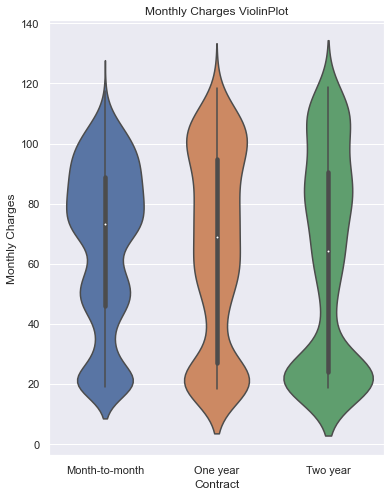

In [7]:
plt.figure(figsize = (6,8))
sns.violinplot(x="Contract", y="Monthly Charges" , data=df).set_title('Monthly Charges ViolinPlot')
plt.show()

Quite interesting to see. We can see for two-year contracts a significant amount data is skewed upon the lower boundary.
This is confirmed by a lower mean for two-year contracts.
This is likely due to long-term contract holders benefiting from long term deals as opposed to month-to-month contracts.


# 4. Modelling

In this section we are getting the data ready for machine learning. 
This will involve us removing uncessary columns and creating a boolean for the target values

## Dropping Uncessary Coloumns

In [8]:
df = df.drop(['Customer ID'], axis=1)
df.head()

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


## Creating Dummy Variables

In [9]:
x = pd.get_dummies(df)
x.head()

,Senior Citizen,tenure,Monthly Charges,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,...,Total Charges_996.85,Total Charges_996.95,Total Charges_997.65,Total Charges_997.75,Total Charges_998.1,Total Charges_999.45,Total Charges_999.8,Total Charges_999.9,Churn_No,Churn_Yes
0,0,1,29.85,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,1,29.85,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,34,56.95,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,2,53.85,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,45,42.30,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


## Create targets using the churn coloumn

In [10]:
y = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Churn, dtype: int64

We need to check the shape of our targets and inputs to ensure they are equal. This is important when dealing with matricies

In [11]:
x.shape[0] == y.shape[0]

True

# 5. Import ML Dependencies

In [12]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 6. Model

Personally I prefer to keep my hyperparameters from the model so its easier to change and fine tune

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.8)

In [14]:
tf.keras.backend.set_floatx('float64')

In [15]:
input_size = 7 #input size is equal to the number of predictors
output_size = 1 #Output size is one as our targets are either zero's and 1's
hidden_layer_size = 50 


model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    # the final layer is no different, we just make sure to activate it with sigmoid
    # we use sigmoid to covert the output to a number betweeen 1 & 0
    tf.keras.layers.Dense(output_size, activation='sigmoid') # output layer
])
    
model.compile(optimizer = 'sgd', loss='binary_crossentropy', metrics= 'accuracy')

batch_size = 32
max_epochs = 40

model.fit(x_train, y_train, 
          epochs = max_epochs, 
          batch_size = batch_size,
          verbose = 2) 

Epoch 1/40
177/177 - 2s - loss: 0.5016 - accuracy: 0.7634
Epoch 2/40
177/177 - 2s - loss: 0.4777 - accuracy: 0.7791
Epoch 3/40
177/177 - 2s - loss: 0.4620 - accuracy: 0.7941
Epoch 4/40
177/177 - 1s - loss: 0.4589 - accuracy: 0.7950
Epoch 5/40
177/177 - 2s - loss: 0.4486 - accuracy: 0.7998
Epoch 6/40
177/177 - 2s - loss: 0.4511 - accuracy: 0.7979
Epoch 7/40
177/177 - 2s - loss: 0.4411 - accuracy: 0.8007
Epoch 8/40
177/177 - 1s - loss: 0.4371 - accuracy: 0.8011
Epoch 9/40
177/177 - 1s - loss: 0.4259 - accuracy: 0.8060
Epoch 10/40
177/177 - 1s - loss: 0.4281 - accuracy: 0.8018
Epoch 11/40
177/177 - 2s - loss: 0.4061 - accuracy: 0.8153
Epoch 12/40
177/177 - 2s - loss: 0.3886 - accuracy: 0.8295
Epoch 13/40
177/177 - 2s - loss: 0.4019 - accuracy: 0.8234
Epoch 14/40
177/177 - 2s - loss: 0.3888 - accuracy: 0.8254
Epoch 15/40
177/177 - 2s - loss: 0.3652 - accuracy: 0.8413
Epoch 16/40
177/177 - 1s - loss: 0.3676 - accuracy: 0.8358
Epoch 17/40
177/177 - 1s - loss: 0.3792 - accuracy: 0.8357
Epoch 

Ideally, we would like to see our loss reducing and our accuracy increasing with each epoch.
We ought to be keep an eye on overfitting. 
Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. 
In another example, I will demonstrate how to use callbacks and early stopping mechanism to avoid overfitting.


# 7. Testing the Model

In [17]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

45/45 [==============================] - 0s 5ms/step - loss: 3.0252 - accuracy: 0.7055


# 8. Saving the Model

In [18]:
model.save('churnmodel')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: churnmodel\assets


# 8. Evaluation

This is the end. There are several things that I would do differently. 

1. I spent too long breaking down some steps especially when creating my inputs and targets.
2. I would have spent more time visualising the data to see if there were any trends.
3. I would have played around with my hyperparameters to optimize my model.
4. I would use a validation dataset to gain an unbiased estimate of my model. 
4. I would have found dirtier data :)  
